# Data Loading

In [2]:
# import libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
path = "../KPMG/current_customer_with_grades.csv"
current = pd.read_csv(path)

In [4]:
current

,Current_Customer_Grade,owns_car,wealth_segment,past_3_years_bike_related_purchases,property_valuation,age
0,1st grade,1,2,13,8,25.0
1,1st grade,1,1,28,10,48.0
2,1st grade,1,3,92,9,47.0
3,1st grade,0,2,14,10,29.0
4,1st grade,0,2,30,9,47.0
...,...,...,...,...,...,...
3482,4th grade,0,1,40,3,57.0
3483,4th grade,0,2,75,3,27.0
3484,4th grade,1,1,15,10,41.0
3485,4th grade,0,1,27,11,51.0


In [5]:
# how many of each class is in our data set

current['Current_Customer_Grade'].value_counts()

3rd grade    2003
4th grade     955
2nd grade     476
1st grade      53
Name: Current_Customer_Grade, dtype: int64

In [27]:
current['age'].fillna(current['age'].mode()[0], inplace=True)

In [28]:
# check for NULL values in the data

current.isnull().sum()

Current_Customer_Grade                 0
owns_car                               0
wealth_segment                         0
past_3_years_bike_related_purchases    0
property_valuation                     0
age                                    0
dtype: int64

# Data Processing

In [120]:
X=current.iloc[:,[1,2,3,4,5]].values
Y=current.iloc[:,0].values

## Normalizing Data

In [121]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.98661099,  0.29195652, -1.25111664,  0.17159288, -1.43141035],
       [ 0.98661099, -0.90575216, -0.72683604,  0.88011199,  0.41722961],
       [ 0.98661099,  1.48966519,  1.51009452,  0.52585243,  0.33685396],
       [-1.01357071,  0.29195652, -1.2161646 ,  0.88011199, -1.10990775],
       [-1.01357071,  0.29195652, -0.65693196,  0.52585243,  0.33685396]])

## Splitting Dataset

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=10)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (2963, 5) (2963,)
Test set: (524, 5) (524,)


## Oversampling Minority Data

In [10]:
# check if the testset is balanced

grade, count=np.unique(Y_train, return_counts=True)
print(np.asarray((grade, count)))

[['1st grade' '2nd grade' '3rd grade' '4th grade']
 [41 407 1715 800]]


In [11]:
conda install -c glemaitre imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    ca-certificates-2020.10.14 |                0         121 KB
    certifi-2020.6.20          |           py36_0         156 KB
    imbalanced-learn-0.2.1     |           py36_0         117 KB  glemaitre
    joblib-0.17.0              |             py_0         206 KB
    scikit-learn-0.23.2        |   py36h0573a6f_0         5.0 MB
    scipy-1.5.2                |   py36habc2bb6_0        14.3 MB
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0   

In [39]:
# over-sampling minority group
import imblearn
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state=12)
X_res, Y_res = OS.fit_sample(X_train, Y_train)

print(X_res.shape, Y_res.shape)

(4637, 5) (4637,)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [40]:
# check again if the testset is balanced

grade, count=np.unique(Y_res, return_counts=True)
print(np.asarray((grade, count)))

[['1st grade' '2nd grade' '3rd grade' '4th grade']
 [1715 407 1715 800]]


In [41]:
# over-sampling minority group
import imblearn
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state=12)
X_res2, Y_res2 = OS.fit_sample(X_res, Y_res)

print(X_res2.shape, Y_res2.shape)

(5945, 5) (5945,)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [42]:
# check again if the testset is balanced

grade, count=np.unique(Y_res2, return_counts=True)
print(np.asarray((grade, count)))

[['1st grade' '2nd grade' '3rd grade' '4th grade']
 [1715 1715 1715 800]]


In [43]:
# over-sampling minority group
import imblearn
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state=12)
X_res3, Y_res3 = OS.fit_sample(X_res2, Y_res2)

print(X_res3.shape, Y_res3.shape)

(6860, 5) (6860,)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [44]:
# check again if the testset is balanced

grade, count=np.unique(Y_res3, return_counts=True)
print(np.asarray((grade, count)))

[['1st grade' '2nd grade' '3rd grade' '4th grade']
 [1715 1715 1715 1715]]


# Model Training

## Classification: KNN

In [38]:
# Import KNN libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [62]:
# Train the model with different Ks 

Ks = 50
mean_acc_train = np.zeros((Ks-1))
mean_acc_test = np.zeros((Ks-1))
for n in range(20,Ks):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_res3,Y_res3)
    yhat_train = KNN.predict(X_res3)
    yhat_test = KNN.predict(X_test)
    mean_acc_train[n-1] = metrics.accuracy_score(Y_res3, yhat_train)
    mean_acc_test[n-1] = metrics.accuracy_score(Y_test, yhat_test)

In [47]:
mean_acc_train

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.6303207 ,
       0.62653061, 0.61865889, 0.61326531, 0.61020408, 0.60539359,
       0.59854227, 0.59358601, 0.59081633, 0.58804665, 0.58338192,
       0.58046647, 0.5755102 , 0.57274052, 0.56865889, 0.56618076,
       0.56268222, 0.55932945, 0.55553936, 0.55218659, 0.55058309,
       0.54723032, 0.54402332, 0.54154519, 0.53965015, 0.53731778,
       0.53206997, 0.53221574, 0.53090379, 0.52959184])

In [50]:
mean_acc_test

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.25381679,
       0.2519084 , 0.24427481, 0.2519084 , 0.24236641, 0.24618321,
       0.23473282, 0.22900763, 0.23091603, 0.22519084, 0.22519084,
       0.22900763, 0.23282443, 0.21946565, 0.22137405, 0.21946565,
       0.22519084, 0.21374046, 0.22519084, 0.22137405, 0.21183206,
       0.20992366, 0.21374046, 0.20801527, 0.21946565, 0.21564885,
       0.20801527, 0.21374046, 0.20992366, 0.20801527])

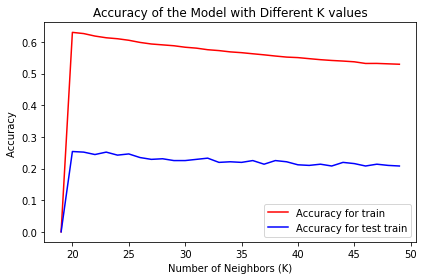

In [54]:
# Choose the best K

plt.plot(range(19,Ks),mean_acc_train[18:],'r')
plt.plot(range(19,Ks),mean_acc_test[18:],'b')

plt.title("Accuracy of the Model with Different K values")
plt.legend(('Accuracy for train', 'Accuracy for test train'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [63]:
print( "The best accuracy was with", mean_acc_test.max(), "with k=", mean_acc_test.argmax()+1)

The best accuracy was with 0.2538167938931298 with k= 20


The accuracy for KNN model is very low, so KNN might not be a good way for the dataset.

## Decision Tree

In [56]:
# Import Decision Tree libraries
from sklearn.tree import DecisionTreeClassifier

In [69]:
# Build the model with different depths

Ks = 20
mean_acc_train = np.zeros((Ks-1))
mean_acc_test = np.zeros((Ks-1))

for d in range(3,Ks):
    
    #Train Model and Predict  
    severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    severityTree.fit(X_res3,Y_res3)
    yhat_train = severityTree.predict(X_res3)
    yhat_test = severityTree.predict(X_test)
    mean_acc_train[d-1] = metrics.accuracy_score(Y_res3, yhat_train)
    mean_acc_test[d-1] = metrics.accuracy_score(Y_test, yhat_test)

print(mean_acc_train)
print(mean_acc_test)

[0.         0.         0.35758017 0.39650146 0.42099125 0.46151603
 0.51195335 0.56282799 0.61443149 0.66005831 0.71778426 0.77419825
 0.81720117 0.86793003 0.89883382 0.92930029 0.95174927 0.96734694
 0.98163265]
[0.         0.         0.15267176 0.20801527 0.33396947 0.18320611
 0.30725191 0.27862595 0.29007634 0.3148855  0.3148855  0.3129771
 0.3129771  0.33396947 0.34160305 0.33587786 0.35496183 0.33969466
 0.34732824]


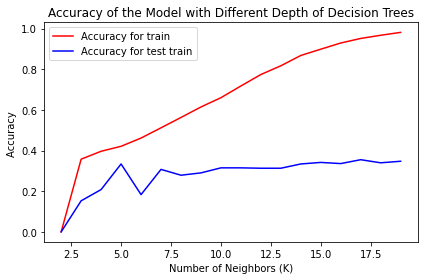

In [70]:
# Choose the best K

plt.plot(range(2,Ks),mean_acc_train[1:],'r')
plt.plot(range(2,Ks),mean_acc_test[1:],'b')

plt.title("Accuracy of the Model with Different Depth of Decision Trees")
plt.legend(('Accuracy for train', 'Accuracy for test train'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [71]:
print( "The best accuracy was with", mean_acc_test.max(), "with k=", mean_acc_test.argmax()+1)

The best accuracy was with 0.3549618320610687 with k= 17


The accuracy for Supervised Training does not turn well. Try Unsupervised Training instead.

## K-Means

In [122]:
print(X.shape, Y.shape)

(3487, 5) (3487,)


In [123]:
# over-sampling minority group

OS = SMOTE(random_state=12)
X_K, Y_K = OS.fit_sample(X, Y)

print(X_K.shape, Y_K.shape)

(5437, 5) (5437,)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [124]:
# check again if the testset is balanced

grade, count=np.unique(Y_K, return_counts=True)
print(np.asarray((grade, count)))

[['1st grade' '2nd grade' '3rd grade' '4th grade']
 [2003 476 2003 955]]


In [125]:
# over-sampling minority group

OS = SMOTE(random_state=12)
X_K2, Y_K2 = OS.fit_sample(X_K, Y_K)

print(X_K2.shape, Y_K2.shape)

(6964, 5) (6964,)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [126]:
# check again if the testset is balanced

grade, count=np.unique(Y_K2, return_counts=True)
print(np.asarray((grade, count)))

[['1st grade' '2nd grade' '3rd grade' '4th grade']
 [2003 2003 2003 955]]


In [127]:
# over-sampling minority group

OS = SMOTE(random_state=12)
X_K3, Y_K3 = OS.fit_sample(X_K2, Y_K2)

print(X_K3.shape, Y_K3.shape)

(8012, 5) (8012,)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [128]:
# check again if the testset is balanced

grade, count=np.unique(Y_K3, return_counts=True)
print(np.asarray((grade, count)))

[['1st grade' '2nd grade' '3rd grade' '4th grade']
 [2003 2003 2003 2003]]


In [72]:
import random 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [73]:
np.random.seed(0)

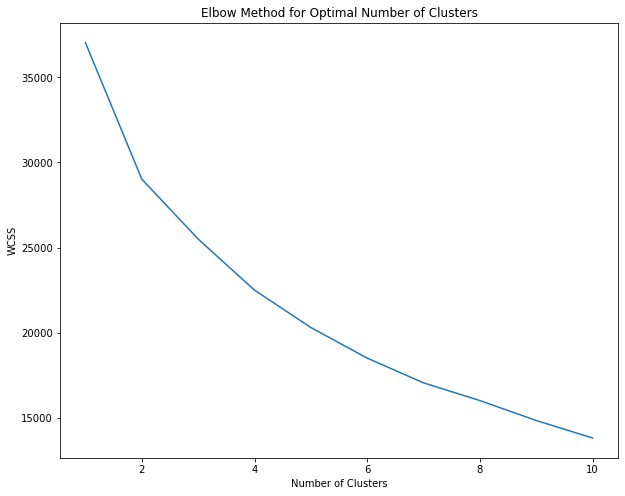

In [129]:
# Set K-means to 10
wcss=[]

for i in range(1,11):
    k_means = KMeans(init = "k-means++", n_clusters = i, random_state=42)
    k_means.fit(X_K3)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(10, 8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As the number of clusters increases, the value of wcss decreases and the dip or elbow shape gives us the appropriate number of clusters to be used. Here it is 4. So use 4 clusters to fit the model.

However, later we re-grade the current table to 10 grades, so now use 10 clusters.  

In [166]:
# fit model with cluster=4

k_means = KMeans(init = "k-means++", n_clusters = 10, random_state=42)
k_means.fit(X)
labels = k_means.labels_

In [167]:
# Check if labels to each row is logical

current["label"] = labels
current

,Current_Customer_Grade,owns_car,wealth_segment,past_3_years_bike_related_purchases,property_valuation,age,label
0,1st grade,1,2,13,8,25.0,2
1,1st grade,1,1,28,10,48.0,6
2,1st grade,1,3,92,9,47.0,7
3,1st grade,0,2,14,10,29.0,3
4,1st grade,0,2,30,9,47.0,8
...,...,...,...,...,...,...,...
3482,4th grade,0,1,40,3,57.0,5
3483,4th grade,0,2,75,3,27.0,5
3484,4th grade,1,1,15,10,41.0,6
3485,4th grade,0,1,27,11,51.0,8


In [169]:
# export file to analyze in SQL

current.to_csv(r'../KPMG/current_customer_with_labels.csv', index = False)

Assign labels to new dataset - Target

In [172]:
path2 = "../KPMG/target_customer.csv"
target = pd.read_csv(path2)

In [173]:
target.drop(['DOB'], axis=1, inplace=True)
target

,owns_car,wealth_segment,past_3_years_bike_related_purchases,property_valuation,age
0,1,1,86,6,63
1,0,1,69,11,50
2,0,2,10,5,46
3,1,2,64,1,41
4,0,2,34,9,55
...,...,...,...,...,...
995,0,2,60,7,61
996,0,1,22,10,19
997,1,2,17,2,66
998,1,1,30,2,67


In [170]:
from sklearn.externals import joblib

joblib.dump(k_means, 'k_means.pkl')
k_means_loaded = joblib.load('k_means.pkl')

k_means_loaded

KMeans(n_clusters=10, random_state=42)

In [174]:
# predit labels for Target

t_label = k_means_loaded.predict(target)

In [175]:
# complete target_customer_with_labels

target["label"] = t_label
target

,owns_car,wealth_segment,past_3_years_bike_related_purchases,property_valuation,age,label
0,1,1,86,6,63,1
1,0,1,69,11,50,1
2,0,2,10,5,46,1
3,1,2,64,1,41,1
4,0,2,34,9,55,1
...,...,...,...,...,...,...
995,0,2,60,7,61,1
996,0,1,22,10,19,1
997,1,2,17,2,66,1
998,1,1,30,2,67,1


In [176]:
# export file

target.to_csv(r'../KPMG/target_customer_with_labels.csv', index = False)

# Assign grades to target_customer

In [159]:
tmp=current.groupby(['Current_Customer_Grade', 'label'])

In [161]:
tmp.size()

Current_Customer_Grade  label
1st grade               0         11
                        1         15
                        2         22
                        3          5
2nd grade               0         87
                        1        132
                        2        166
                        3         91
3rd grade               0        452
                        1        571
                        2        622
                        3        358
4th grade               0        203
                        1        302
                        2        285
                        3        165
dtype: int64

We cannot tell which lable occurs most in the grade.
Try to increase the number of grade from original table.

In [178]:
path3 = "../KPMG/regrade_current_customer_with_labels.csv"
regrade = pd.read_csv(path3)

In [185]:
tmp2=regrade.groupby(['label', 'Current_Customer_Grade'])
tmp2.size()

label  Current_Customer_Grade
0      10th grade                34
       2nd grade                  4
       3rd grade                  4
       4th grade                 15
       5th grade                 31
                                 ..
9      5th grade                 22
       6th grade                 42
       7th grade                 63
       8th grade                 66
       9th grade                 52
Length: 98, dtype: int64

Assign Grade to Target customers

In [201]:
def conditions(target):
    if (target['label']==0): return '8th grade'
    elif (target['label']==1): return '8th grade'
    elif (target['label']==2): return '7th grade'
    elif (target['label']==3): return '9th grade'
    elif (target['label']==4): return '8th grade'
    elif (target['label']==5): return '6th grade'
    elif (target['label']==6): return '6th grade'
    elif (target['label']==7): return '8th grade'
    elif (target['label']==8): return '9th grade'
    else: return '5th grade'
    
target['customer_grade'] = target.apply(conditions, axis = 1)


In [202]:
target

,owns_car,wealth_segment,past_3_years_bike_related_purchases,property_valuation,age,label,customer_grade
0,1,1,86,6,63,1,8th grade
1,0,1,69,11,50,1,8th grade
2,0,2,10,5,46,1,8th grade
3,1,2,64,1,41,1,8th grade
4,0,2,34,9,55,1,8th grade
...,...,...,...,...,...,...,...
995,0,2,60,7,61,1,8th grade
996,0,1,22,10,19,1,8th grade
997,1,2,17,2,66,1,8th grade
998,1,1,30,2,67,1,8th grade


In [203]:
# export file

target.to_csv(r'../KPMG/grade_target_customer_with_labels.csv', index = False)